## Decision tree Classifier Assignment using Iris Data
In this assignment we utilize the Irirs data dowmnloaded from Kaggle and pregicting wether a flower below to a particular species or not. W e will also show this by using a deciosion tree classifier.

In [155]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from category_encoders import OrdinalEncoder
from sklearn.utils.validation import check_is_fitted
from sklearn.preprocessing import LabelEncoder

warnings.simplefilter(action="ignore", category=FutureWarning)

## Import Data
let"s import data for wrangling


In [113]:
#import data
def wrangle(data):
    df= pd.read_csv(data)

    #drop id column
    df.drop(columns="Id", inplace=True)
    
    return df

In [114]:
#load data
df= wrangle("Iris.csv")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Let's know more about our data by checking the information and the shape

## Explore
Let's explore our data and know more about it's content.

In [115]:
#check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [116]:
df.shape

(150, 5)

In [117]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

You can see that we have three species which include **Iris-setosa**, **Iris-versicolor**, and **Iris-virginica**. Let us explore the number of each species in the data.

In [118]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Amazing! the data contains equal number of species.

## Split
we split our data into target vector and feature matrices as follows

In [119]:
#split data into X and y
target="Species"
X= df.drop(columns=target)
y = df[target]

In [160]:
encoder = LabelEncoder()
y_encode = encoder.fit_transform(y)

print(y_encode)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Let divide our data into training set and validation test

In [161]:
#split data using train split test
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [162]:
#validation dataset
X_train,X_val,y_train,y_val=train_test_split(
    X_train,y_train,test_size=0.2,random_state=42
)

In [163]:
print(y_train.shape)

(96,)


## Build model
To build our model, we first calculate the baseline accuract score

In [164]:

acc_baseline = y_train.value_counts(normalize=True).max()
print("baseline accuracy score:", round(acc_baseline,2))

baseline accuracy score: 0.35


We have a baseline accuracy scoore of 34. let proceed to instantiate our model

In [230]:
model = make_pipeline(OrdinalEncoder(),DecisionTreeClassifier(max_depth = 5, random_state=42))

#fit model
model.fit(X_train,y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

We calculate accuracy score for the training dataset and validation dataset

In [231]:
training_acc= accuracy_score(y_train, model.predict(X_train))
validation_acc= model.score(X_val,y_val)
print("Trainning accuracy score:", round(training_acc,2))
print("Validation accuracy score:", round(validation_acc,2))

Trainning accuracy score: 0.99
Validation accuracy score: 0.92


In [232]:
#print tree depth
tree_depth= model.named_steps["decisiontreeclassifier"].get_depth()
tree_depth

5

In [233]:
depth_hyperparams=range(1,50,2)
depth_hyperparams

range(1, 50, 2)

In [234]:
#create empty list for traing accuracy and validation accuracy
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    #create model with max_depth d
    test_model=DecisionTreeClassifier(max_depth=d, random_state=42)
    
    #fit model into trainig data
    test_model.fit(X_train,y_train)

    #calculate accuracy score and append to traindg and validation data set
    
    training_acc.append(test_model.score(X_train,y_train))
    validation_acc.append(test_model.score(X_val,y_val))

print("Training Accuracy Scores:", training_acc[:3])
print("Validation Accuracy Scores:", validation_acc[:3])
    

Training Accuracy Scores: [0.6875, 0.96875, 0.9895833333333334]
Validation Accuracy Scores: [0.5416666666666666, 0.9166666666666666, 0.9166666666666666]


## Evaluate
let's calculate our accuracy score by fitting the data into the test 

In [235]:
# calculate the test accuracy
test_acc = model.score(X_test,y_test)
print("test accuracy score:", round(test_acc,2))

test accuracy score: 0.93


# Communicate
let plot a decision tree to show our accuracy score

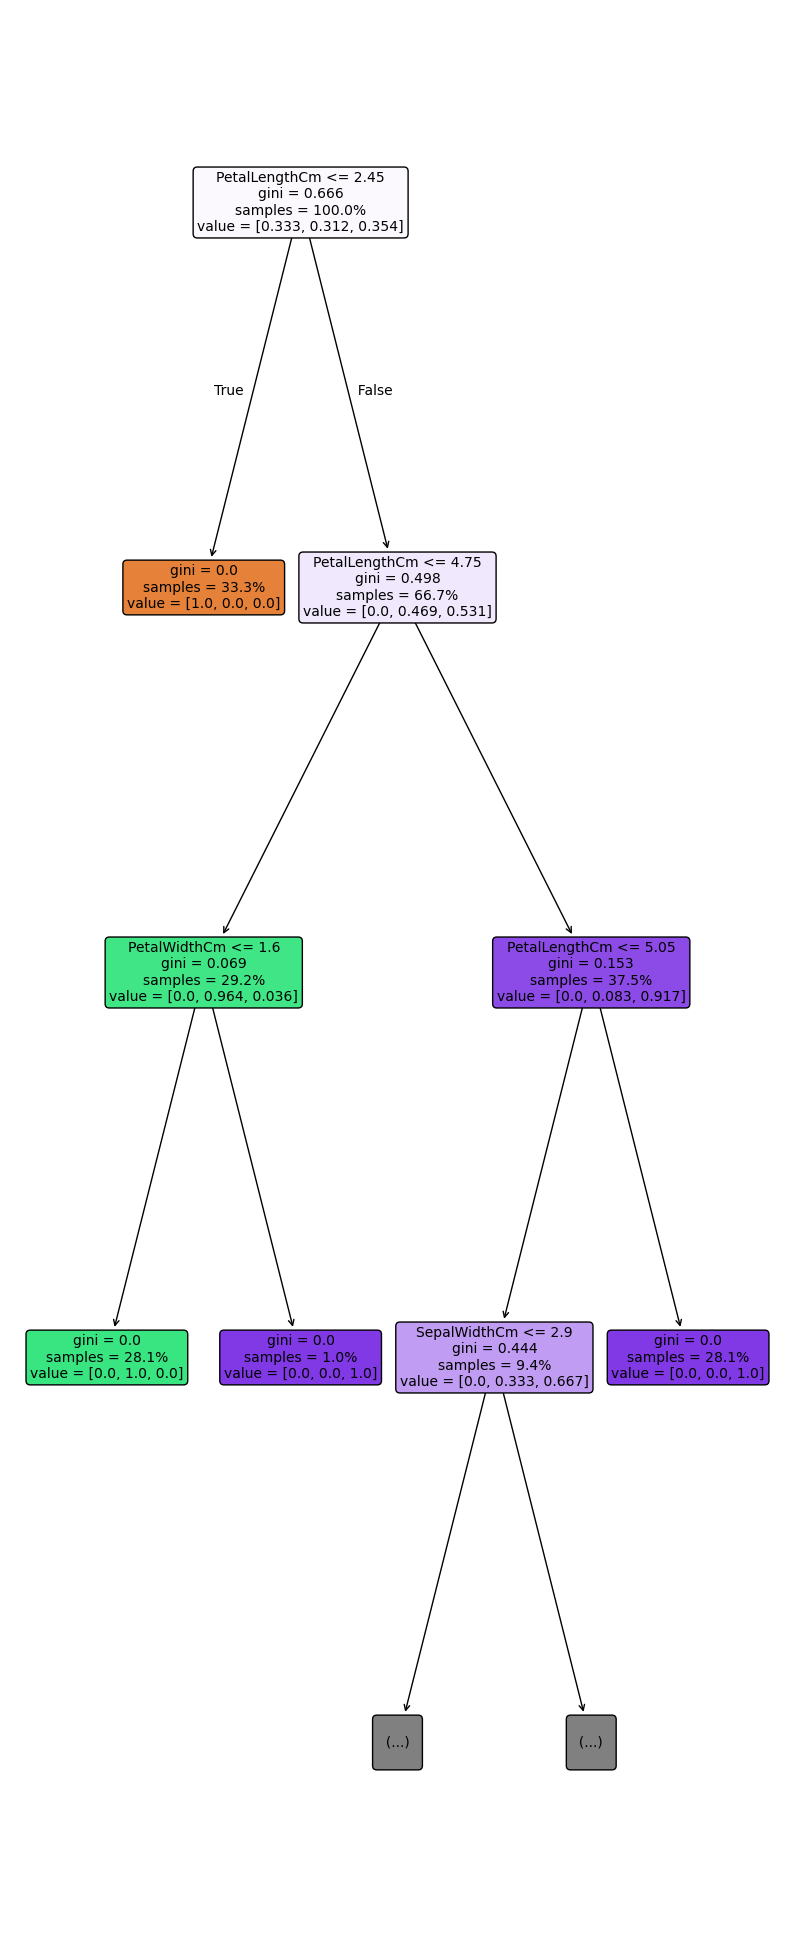

In [242]:
#set layout
fig, ax =plt.subplots(figsize=(10,25))

#plot tree
plot_tree(
   decision_tree = model.named_steps["decisiontreeclassifier"],
   feature_names = X_train.columns.tolist(),
    filled=True,
    rounded = True,
    proportion = True,
    max_depth = 3,
    fontsize=10,
    ax=ax
    
);

## Gini Importance

In [238]:
#get the feature importances of our model
features = X_train.columns
importances = model.named_steps["decisiontreeclassifier"].feature_importances_

#print out output
print("features:",features[:3])
print("importances:",importances[:3])

features: Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm'], dtype='object')
importances: [0.         0.0397351  0.92961211]


In [226]:
# put this to series
feat_imp = pd.Series(importances,index=features).sort_values(ascending=True)
feat_imp

SepalLengthCm    0.000000
PetalWidthCm     0.030653
SepalWidthCm     0.039735
PetalLengthCm    0.929612
dtype: float64

 Let plot our gini importances

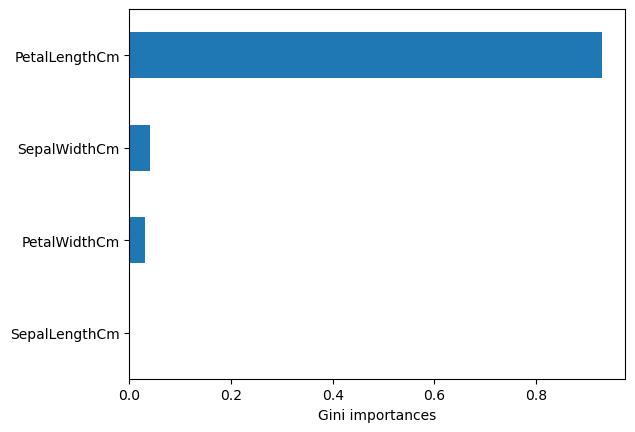

In [229]:
feat_imp.plot(kind="barh")
plt.xlabel("Gini importances");